# Data Preprocessing 
v0.1

#### Import the required libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [3]:
data_file = "./Datasets/all_price_data.csv"
dataset = pd.read_csv(data_file)

#### Display the first few rows of the dataset to check dataset

In [4]:
print(dataset.head())

   year  month     location  wholesale_price  retail_price
0  2017      1  Keppetipola            45.42          98.0
1  2017      1   Kurunegala              NaN           NaN
2  2017      1       Ampara              NaN         124.8
3  2017      1       Matale              NaN           NaN
4  2017      1     Vavuniya              NaN          78.0


## Handle Missing Values
### Count the number of missing values in each column

In [5]:
print(dataset.isnull().sum())

year                  0
month                 0
location              0
wholesale_price    1652
retail_price        791
dtype: int64


## Find & Remove Outliers before handle missing values

In [7]:
# Count the number of records before dropping
num_records_before = len(dataset)
num_records_before

2664

### Plot the histogram

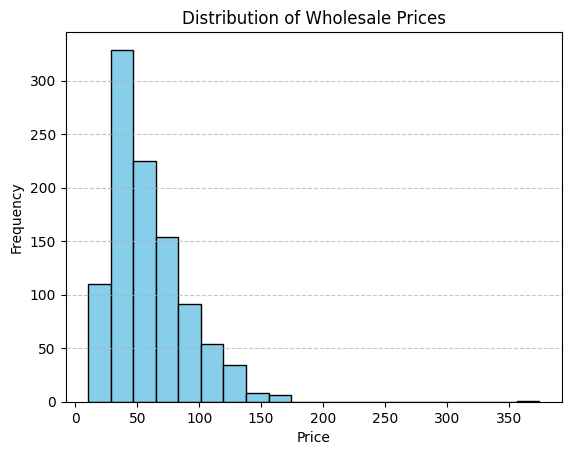

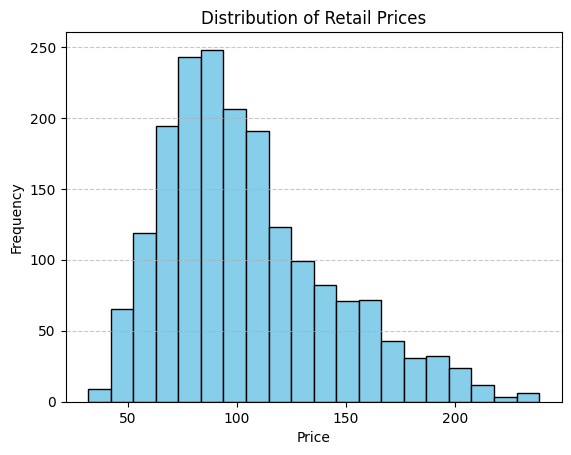

In [9]:
plt.hist(dataset['wholesale_price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Wholesale Prices')  # Add a title
plt.xlabel('Price')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

plt.show()

plt.hist(dataset['retail_price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Retail Prices')  # Add a title
plt.xlabel('Price')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

plt.show()

### Find & Remove Outliers in 'wholesale_price'

In [10]:
wholesale_price_outliers = dataset['wholesale_price'] > 200
dataset = dataset[~wholesale_price_outliers]

# Count the number of records after dropping outliers and missing values
num_records_after = len(dataset)
num_records_after

2663

### Plot the histogram for 'wholesale_price'

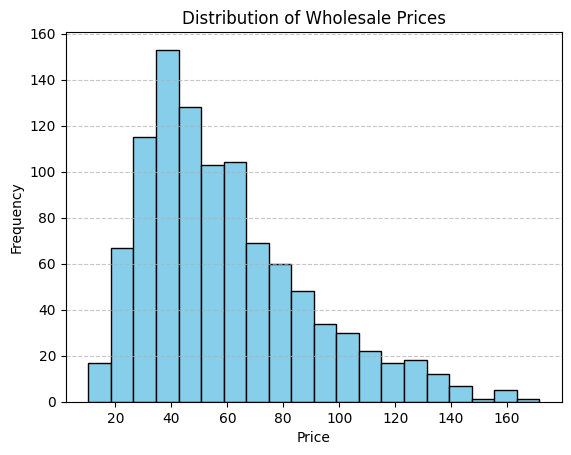

In [11]:
# Plot the histogram for 'wholesale_price'
plt.hist(dataset['wholesale_price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Wholesale Prices')  # Add a title
plt.xlabel('Price')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines

plt.show()

#### Calculate how many records were dropped

In [12]:
num_records_dropped = num_records_before - num_records_after

# Display the number of records dropped
print("Number of records dropped:", num_records_dropped)

Number of records dropped: 1


## Data Imputation
- The code performs data preprocessing on the dataset by handling missing values and filling them using 
the mean percentage difference between wholesale and retail prices for each month.
- `imputing_wholesale_retail_part1.py` Script

In [13]:
# Define a function to calculate the percentage difference
def calculate_percentage_difference(group):
    wholesale_price = group['wholesale_price']
    retail_price = group['retail_price']
    
    # Calculate percentage difference only if both prices are available
    if not pd.isnull(wholesale_price).all() and not pd.isnull(retail_price).all():
        return ((retail_price - wholesale_price) / wholesale_price).mean()
    return None

# Group the data by year and month
grouped = dataset.groupby(['year', 'month'])

# Calculate the mean percentage difference for each month
mean_percentage_differences = grouped.apply(calculate_percentage_difference)

# Fill missing values based on the calculated mean percentage differences
for index, row in dataset.iterrows():
    if pd.isnull(row['wholesale_price']) and not pd.isnull(row['retail_price']):
        # Fill missing wholesale_price using the mean percentage difference for the month
        month = row['month']
        dataset.at[index, 'wholesale_price'] = round(row['retail_price'] / (1 + mean_percentage_differences.get((row['year'], month), 0)), 2)

    elif not pd.isnull(row['wholesale_price']) and pd.isnull(row['retail_price']):
        # Fill missing retail_price using the mean percentage difference for the month
        month = row['month']
        dataset.at[index, 'retail_price'] = round(row['wholesale_price'] * (1 + mean_percentage_differences.get((row['year'], month), 0)), 2)

# Save the dataset with filled missing values
# dataset.to_csv("./Datasets/imputed_wholesale_retail_part1_dataset.csv", index=False) # Uncomment to save the file

# Reload the original dataset to see the difference
dataset_original = pd.read_csv(data_file)

# After Imputation
## Count the number of missing values in each column
print(dataset.isnull().sum())

year                 0
month                0
location             0
wholesale_price    785
retail_price       785
dtype: int64


**Note:**
This script does not currently handle the situation where both price values are empty. 
Addressing this specific scenario is planned in the 'imputing_wholesale_retail_part2' script.

------------------------